In [2]:
# Importing necessary libraries
import polars as pl
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Setting random seed for reproducibility
random.seed(42)

In [3]:
train_data = pl.read_csv('data/codetest_train.txt', separator="\t")
test_data = pl.read_csv('data/codetest_test.txt', separator="\t")

# Display first few rows of training data
print(train_data.head(3))
train_data.describe()

shape: (3, 255)
┌───────────┬────────┬────────┬────────┬───┬───────┬────────┬────────┬────────┐
│ target    ┆ f_0    ┆ f_1    ┆ f_2    ┆ … ┆ f_250 ┆ f_251  ┆ f_252  ┆ f_253  │
│ ---       ┆ ---    ┆ ---    ┆ ---    ┆   ┆ ---   ┆ ---    ┆ ---    ┆ ---    │
│ f64       ┆ f64    ┆ f64    ┆ f64    ┆   ┆ f64   ┆ f64    ┆ f64    ┆ f64    │
╞═══════════╪════════╪════════╪════════╪═══╪═══════╪════════╪════════╪════════╡
│ 3.066056  ┆ -0.653 ┆ 0.255  ┆ -0.615 ┆ … ┆ 0.17  ┆ -0.418 ┆ -1.244 ┆ -0.503 │
│ -1.910473 ┆ 1.179  ┆ -0.093 ┆ -0.556 ┆ … ┆ 1.281 ┆ -0.85  ┆ 0.821  ┆ -0.26  │
│ 7.830711  ┆ 0.181  ┆ -0.778 ┆ -0.919 ┆ … ┆ 1.435 ┆ 1.332  ┆ -1.147 ┆ 2.58   │
└───────────┴────────┴────────┴────────┴───┴───────┴────────┴────────┴────────┘


statistic,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,…,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",5000.0,4903.0,4928.0,4908.0,4910.0,4907.0,4912.0,4897.0,4904.0,4893.0,4911.0,4896.0,4898.0,4903.0,4907.0,4919.0,4878.0,4903.0,4906.0,4906.0,4887.0,4905.0,4895.0,4891.0,4893.0,4917.0,4916.0,4914.0,4892.0,4898.0,4909.0,4903.0,4906.0,4897.0,4893.0,4892.0,…,4903.0,4893.0,4898.0,4906.0,4909.0,4894.0,4900.0,4898.0,4885.0,4895.0,4901.0,4891.0,4917.0,4890.0,4900.0,4908.0,4903.0,4902.0,4899.0,4909.0,"""4905""",4891.0,4907.0,4896.0,4899.0,4907.0,4914.0,4910.0,4883.0,4914.0,4894.0,4902.0,4886.0,4900.0,4921.0,4904.0,4904.0
"""null_count""",0.0,97.0,72.0,92.0,90.0,93.0,88.0,103.0,96.0,107.0,89.0,104.0,102.0,97.0,93.0,81.0,122.0,97.0,94.0,94.0,113.0,95.0,105.0,109.0,107.0,83.0,84.0,86.0,108.0,102.0,91.0,97.0,94.0,103.0,107.0,108.0,…,97.0,107.0,102.0,94.0,91.0,106.0,100.0,102.0,115.0,105.0,99.0,109.0,83.0,110.0,100.0,92.0,97.0,98.0,101.0,91.0,"""95""",109.0,93.0,104.0,101.0,93.0,86.0,90.0,117.0,86.0,106.0,98.0,114.0,100.0,79.0,96.0,96.0
"""mean""",1.143878,-0.000433,0.002564,0.028877,-0.005437,-0.006759,0.005569,0.001536,-0.001019,0.009744,-0.002623,0.000073,-0.009202,-0.000324,0.003115,-0.002282,0.014381,-0.00133,-0.006361,-0.002493,-0.002733,0.009365,-0.00464,-0.012864,0.002903,0.003049,-0.021285,0.025538,0.02411,-0.017331,-0.007649,0.002047,-0.011291,-0.002174,-0.007985,-0.026758,…,0.005281,0.004151,-0.00706,0.015343,-0.006568,-0.000927,-0.001484,0.009698,-0.009148,-0.000986,0.006044,-0.002879,-0.015387,-0.009309,-0.008231,-0.012253,0.008298,0.004697,0.01088,0.006435,null,-0.000705,-0.016669,0.020621,0.01705,-0.002852,0.001184,0.013529,0.004941,0.023261,-0.018447,-0.009842,0.016958,-0.004947,0.016868,-0.001351,0.010334
"""std""",5.259896,0.999739,0.99793,1.019337,0.990351,1.006293,0.995799,1.004624,0.997356,0.98831,1.005423,0.998567,0.977567,0.995232,1.002342,0.980518,1.007892,1.002457,0.990295,0.976825,0.994824,0.999684,0.999204,1.004528,0.997333,0.997115,0.985904,1.00706,0.994893,1.014013,0.998331,1.002735,0.986843,1.000659,1.012304,0.997636,…,0.991621,1.000414,1.005537,1.014935,1.017474,0.987297,0.995355,0.99082,1.005192,0.998329,1.003497,1.009358,1.005849,1.001349,0.984213,0.998838,0.996406,1.009578,1.002189,0.996727,null,0.989605,0.986699,0.995179,0.99345,1.014942,0.992127,1.001453,0.99733,0.996458,1.005,0.989228,1.011331,0.991577,1.001358,1.003411,1.006896
"""min""",-26.70557,-3.941,-3.847,-3.818,-3.434,-3.4,-4.051,-3.179,-3.89,-3.857,-3.91,-3.373,-3.865,-3.368,-3.894,-3.345,-4.074,-3.845,-3.988,-3.794,-3.754,-3.496,-3.666,-3.604,-3.913,-3.505,-3.928,-3.465,-3.619,-4.615,-3.301,-3.377,-3.742,-3.269,-3.911,-3.167,…,-3.45,-3.502,-4.43,-3.618,-3.868,-4.056,-3.414,-3.714,-3.988,-4.478,-3.751,-3.816,-3.593,-3.642,-3.361,-4.057,-3.874,-3.582,-4.158,-3.487,"""Canada""",-3.832,-3.611,-3.742,-3.413,-3.473,-3.848,-3.585,-3.494,-3.485,-4.012,-3.252,-3.821,-3.376,-3.373,-3.95,-3.728
"""25%""",-2.034193,-0.673,-0.685,-0.651,-0.655,-0.685,-0.66,-0.672,-0.679,-0.662,-0.675,-0.678,-0.661,-0.673,-0.664,-0.647,-0.655,-0.664,-0.688,-0.652,-0.668,-0.679,-0.678,-0.679,-0.686,-0.682,-0.685,-0.662,-0.643,-0.721,-0.688,-0.674,-0.674,-0.671,-0.683,-0.728,…,-0.647,-0.692,-0.693,-0.649,-0.667,-0.654,-0.671,-0.671,-0.675,-0.659,-0.669,-0.669,-0.684,-0.679,-0.682,-0.675,-0.68,-0.679,-0.658,-0.675,null,-0.668,-0.661,-0.651,-0.632,-0.683,-0.654,-0.666,-0.676,-0

In [7]:
train_data.plot.hist("target", bins=50)

AttributeError: Altair has no method 'mark_hist'

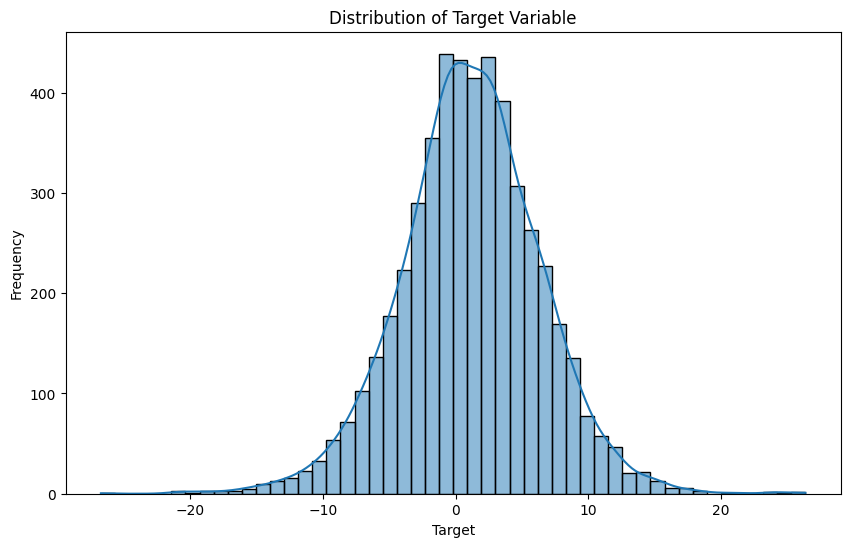

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['target'], bins=50, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()